In [8]:
from __future__ import print_function, division   
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as linalg
import time
from numba import njit, prange
%matplotlib inline

# Our General Alg has 7 FLOPs

In [40]:
#General Algorithm!
def TriSolve(a,b,c,f,dim):
    u = np.zeros(dim)
    for i in range(1, dim):
        val = a[i]/b[i-1]
        b[i] -= val*c[i-1]
        f[i] -= val*f[i-1]
    u[-1] = f[-1]/b[-1]
    for i in range(dim-1,0,-1):
        u[i-1] = (f[i-1] - c[i-1]*u[i])/b[i-1]
    return u

def General(n):
    dim = n
    h = 1/dim
    a = -np.ones(dim)
    a[0] = 0
    b = 2*np.ones(dim)
    c = -np.ones(dim)
    c[-1] = 0    
    f = np.ones(dim)
    j = 0
    while j <= dim-1:
        f[j] = 100*np.exp(-10*j*h)*h**2
        j += 1

    start = time.perf_counter()   
    calculated = TriSolve(a,b,c,f,dim)
    end = time.perf_counter()
    return end - start
#     return calculated

# Our Specialized Alg has 7 FLOPs

In [41]:
def Tridag(n):
    dim = n
    h = 1/dim
    d = np.ones(dim+1)
    b = np.ones(dim+1)
    sol = np.ones(dim+1)
    d[0]=2
    d[dim]=2
    sol[0]=0
    sol[dim]=0
    
    
    j = 0    
    while j <= dim:
        b[j] = 100*np.exp(-10*j*h)*h**2
        j+=1
    
    start = time.perf_counter()
    i = 1
    while i < dim:
        d[i] = (i+1.)/i
        i+=1
    
    for i in range(2,dim):
        b[i] = b[i] + (b[i-1]/d[i-1])
        
    sol[dim-1] = b[dim-1]/d[dim-1]
    
    for j in range(dim-2,0,-1):
        sol[j] = (b[j]+sol[j+1])/d[j]
    end = time.perf_counter()
    
    return end - start
#     return sol

In [84]:
n_vals = [10,100,1000,10000,100000,1000000]
gen_time =  [3.80354e-5,.0003454,.002644,.02133043,.214901,2.009923]
spec_time = [2.139e-5  ,.0002000,.0019614,.014722 ,.148026,1.329353]

In [85]:
av = 0
runs = 5
for r in range(runs):
    av += Tridag(100)
print(av/runs)

0.00022838339209556579


In [86]:
av = 0
runs = 5
for r in range(runs):
    av += General(100)
print(av/runs)

0.0004588743671774864


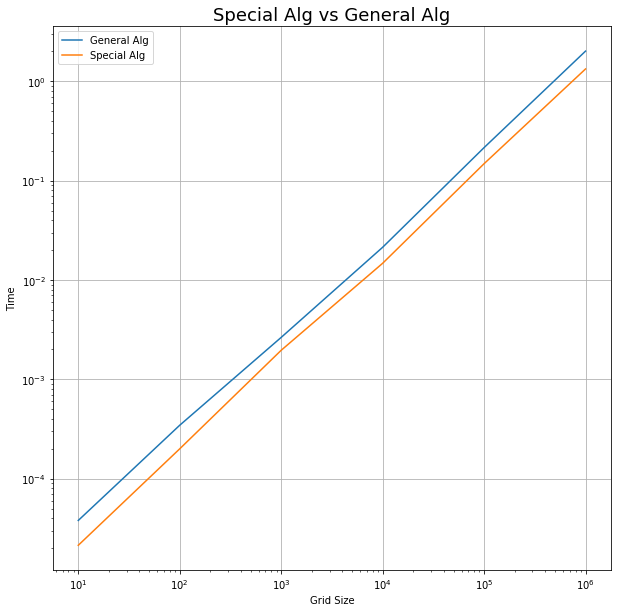

In [88]:
plt.figure(figsize=(10,10))
plt.loglog(n_vals,gen_time,label = 'General Alg')
plt.loglog(n_vals,spec_time,label = 'Special Alg')
plt.title('Special Alg vs General Alg',fontsize = 18)
plt.ylabel('Time')
plt.xlabel('Grid Size')
plt.grid()
plt.legend()